In [13]:
import os
if "/content" in os.getcwd():
  !rm -rf WHere_codes/
  !git clone https://github.com/keenranger/WHere_codes
  os.chdir("/content/WHere_codes")
from PDR.modules.DataLoader import *
from PDR.modules.Walker import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
file_name = "msmr3"
pvloader = DataLoader("PDR/data/200625.db", file_name)
pvloader.DBLoader()
sensor_df = pvloader.sensor_df[["time", "accx", "accy", "accz", "gyrox", "gyroy",
                                "gyroz", "rot0", "rot1", "rot2", "rot3", "game0", "game1", "game2", "game3"]]
print(sensor_df)

Data parsing... 
Data parsing done!
               time      accx      accy      accz     gyrox     gyroy  \
0     1592988330120 -0.299262  2.623932  9.322621 -0.112105  0.169598   
1     1592988330140 -0.256169  2.765184  9.269950 -0.102942 -0.014273   
2     1592988330160 -0.299262  2.690967  9.734406 -0.013755 -0.061309   
3     1592988330180 -0.469243  2.585627  9.473449 -0.019253  0.016882   
4     1592988330200 -0.383056  2.659844  9.411202 -0.055905  0.031542   
...             ...       ...       ...       ...       ...       ...   
5498  1592988440083 -0.574584  1.335907  9.116728 -0.015449  0.186316   
5499  1592988440103 -0.644013  1.876973  9.250798 -0.020947 -0.338417   
5500  1592988440123  0.454879  1.795574  9.767923 -0.089975 -0.324367   
5501  1592988440143  0.404603  1.666293  9.964239 -0.187713  0.035432   
5502  1592988440163  0.014365  1.307178  9.822987 -0.246967  0.218691   

         gyroz      rot0      rot1      rot2      rot3     game0     game1  \
0    -0.0

In [15]:
walker = Walker()
for row in sensor_df.itertuples():
    if row[0] % 1000 == 0:
        print("step is " + str(row[0]))
    walker.step(row[0], row[1], row[2:5], row[5:8], row[8:12], row[12:16])


step is 0
step is 1000
step is 2000
step is 3000
step is 4000
step is 5000


In [16]:

displacement_df = pdr_to_displacement(walker.pdr_df)
position_df = displacement_df.cumsum()
print(walker.pdr_df)

length      body       nav       rot      game    fusion
0     0.65  1.380953  1.378140  1.336156  0.640131  0.640131
1     0.65  1.401172  1.395845  1.372065  1.349425  1.349425
2     0.65  1.414562  1.413009  1.389089  1.363422  1.363422
3     0.65  1.410284  1.409784  1.382562  1.358905  1.358905
4     0.65  1.402935  1.403364  1.376790  1.351167  1.351167
..     ...       ...       ...       ...       ...       ...
91    1.30  0.433905 -1.982824  2.854711  3.111717  3.111717
92    1.30  0.230507 -1.818616  2.907437  3.145749  3.145749
93    1.30  0.315272 -1.794131  2.886852  3.123426  3.123426
94    1.30  0.382649 -1.815192  2.905128  3.138447  3.138447
95    0.65  1.169049 -1.904368  2.797039  3.029696  3.029696

[96 rows x 6 columns]


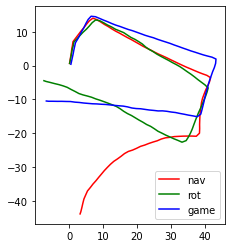

In [17]:
fig, ax = plt.subplots()
ax.plot(position_df['nav_x'],
        position_df['nav_y'], label="nav", c='r')
ax.plot(position_df['rot_x'],
        position_df['rot_y'], label="rot", c='g')
ax.plot(position_df['game_x'],
        position_df['game_y'], label="game", c='b')
ax.legend(loc='best')
ax.set_aspect('equal')

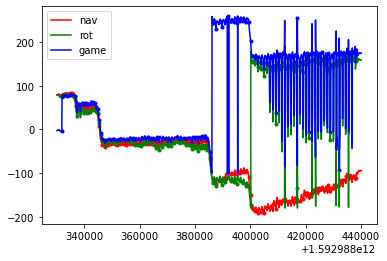

In [18]:
fig2, ax2 = plt.subplots()
ax2.plot(walker.headingcalc.heading_df['time'],
            np.rad2deg(walker.headingcalc.heading_df['nav']), label="nav", c='r')
ax2.plot(walker.headingcalc.heading_df['time'],
            np.rad2deg(walker.headingcalc.heading_df['rot']), label="rot", c='g')
ax2.plot(walker.headingcalc.heading_df['time'],
            np.rad2deg(walker.headingcalc.heading_df['game']), label="game", c='b')
peak_index = walker.pvdetect.peak_df["idx"]
ax2.scatter(walker.headingcalc.heading_df['time'].loc[peak_index],
            np.rad2deg(walker.headingcalc.heading_df['nav'].loc[peak_index]), marker='.', c='r')
ax2.scatter(walker.headingcalc.heading_df['time'].loc[peak_index],
            np.rad2deg(walker.headingcalc.heading_df['rot'].loc[peak_index]), marker='.', c='g')
ax2.scatter(walker.headingcalc.heading_df['time'].loc[peak_index],
            np.rad2deg(walker.headingcalc.heading_df['game'].loc[peak_index]), marker='.', c='b')
ax2.legend(loc='best')